# Load and analyze data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,district_area,road_distance_1,road_distance_2,year_of_construction,bulvar_ring_km,bus_station_distance,cafe_count,fitness_center_distance,floor,district_population,...,product_type,public_transport_station_distance,sadovoe_km,base_school_distance,sport_count,state,district_name,timestamp,malls_count,railway_station_distance
0,6.407578e+06,1.422391,3.830951,NaN,13.675657,24.292406,152,0.485841,4.0,86206,...,Investment,3.299822,13.100618,0.177975,52,NaN,Bibirevo,2011-08-20,52,14.231961
1,9.589337e+06,2.887377,3.103996,NaN,8.132640,5.706113,177,0.668364,3.0,76284,...,Investment,0.783160,6.444333,0.273345,66,NaN,Nagatinskij Zaton,2011-08-23,40,9.242586
2,4.808270e+06,0.647250,2.927487,NaN,8.054252,6.710302,122,0.733101,2.0,101982,...,Investment,3.945073,6.963403,0.158072,67,NaN,Tekstil'shhiki,2011-08-27,35,9.540544
3,1.258354e+07,2.677824,2.780449,NaN,18.309433,6.734618,61,0.623484,9.0,21155,...,Investment,1.579164,17.457198,0.236455,26,NaN,Mitino,2011-09-01,22,17.478380
4,8.398461e+06,1.721834,3.133531,NaN,0.787593,1.423428,2283,0.220288,4.0,28179,...,Investment,0.857764,0.046810,0.376838,195,NaN,Basmannoe,2011-09-05,114,1.595898


In [3]:
column_types = {}
target = 'result_price'
num_features = []
cat_features = []

In [4]:
train_df = train_df[train_df['total_area'] > 1]

## Target

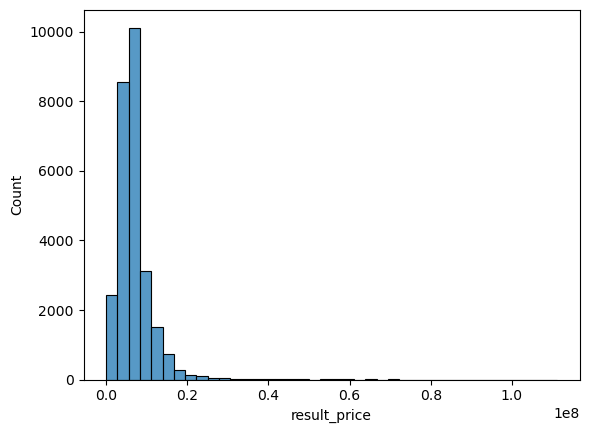

In [5]:
sns.histplot(
    data=train_df,
    x=target,
    bins=40
)
plt.show()

In [6]:
train_df['product_type'].unique()

array(['Investment', 'OwnerOccupier'], dtype=object)

## District

In [7]:
column_types['district'] = [
    'district_population',
    'district_name',
    'district_area',
]

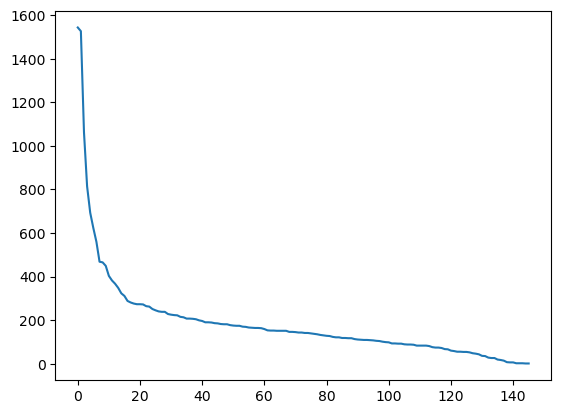

In [8]:
tmp = train_df['district_name'].value_counts().to_frame().reset_index()
plt.plot(tmp.index, tmp['district_name'])
plt.show()

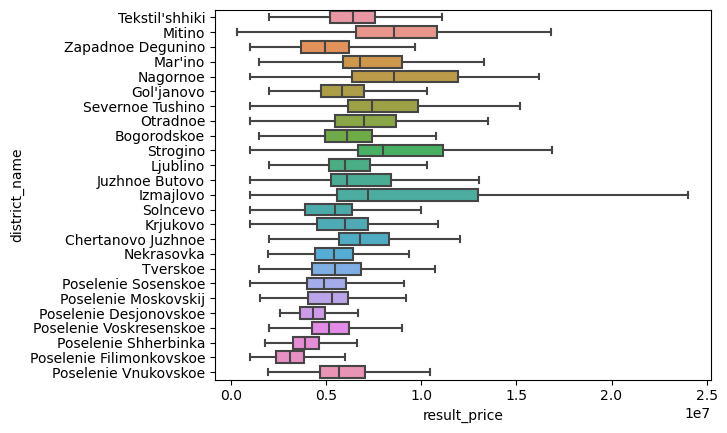

In [9]:
most_popular_districts = train_df['district_name'].value_counts().index[:25]

sns.boxplot(
    data=train_df[train_df['district_name'].isin(most_popular_districts)], 
    x=target, 
    y='district_name', 
    showfliers=False
)
plt.show()

### Feature engineering 

In [10]:
train_df['district_density'] = train_df['district_area'] / train_df['district_population']
column_types['district'] += ['district_density']

In [11]:
column_types['district'] += ['district_density']

In [12]:
cat_features += ['district_name']
num_features += ['district_population', 'district_area', 'district_density']

## Date

In [13]:
column_types['dates'] = ['timestamp']

### Feature engineering

In [14]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month.astype(str)
train_df['year_month'] = train_df['year'].astype(str) + '_' +  train_df['month'].astype(str)

min_date = datetime(year=2010, month=1, day=1)
assert min_date < train_df['timestamp'].min()
train_df['days_since'] = (train_df['timestamp'] - min_date).dt.days

column_types['dates'] += ['year', 'month', 'days_since']

In [15]:
num_features += ['year']

## Neighbourhood

In [16]:
column_types['neighbourhood'] = [
    'cafe_count',
    'base_school_distance',
    'road_distance_1',
    'road_distance_2',
    'bulvar_ring_km',
    'bus_station_distance',
    'fitness_center_distance',
    'green_part',
    'green_zone_distance',
    'healthcare_centers_count',
    'kremlin_distance',
    'leisure_count',
    'market_count',
    'metro_minutes',
    'mkad_distance',
    'office_count',
    'park_distance',
    'public_transport_station_distance',
    'sadovoe_km',
    'sport_count',
    'malls_count',
    'railway_station_distance',
]

In [17]:
num_features += column_types['neighbourhood']

## Flat

In [18]:
column_types['flat'] = [
    'total_area',
    'living_area',
    'kitchen_area',
    'floor',
    'floors_num',
    'wall_material',
    'rooms_num',
    'product_type',
    'year_of_construction',
    'state',
]

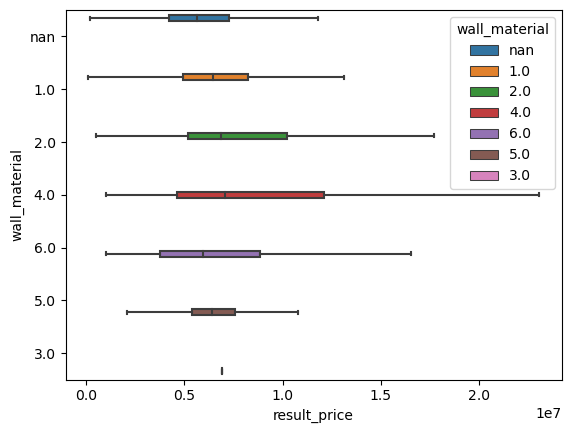

In [19]:
sns.boxplot(
    x=train_df[target],
    y=train_df['wall_material'].astype(str),
    hue=train_df['wall_material'].astype(str),
    showfliers=False    
)
plt.show()

In [20]:
train_df['wall_material'].astype(pd.Int64Dtype()).value_counts()

1    11979
2     2577
5     1381
4     1070
6      626
3        1
Name: wall_material, dtype: Int64

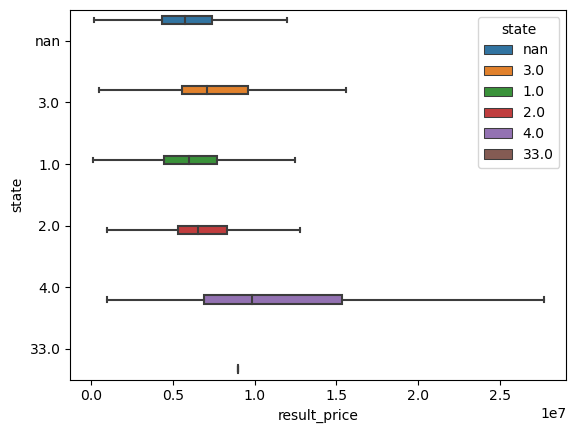

2     5046
3     4993
1     3697
4      372
33       1
Name: state, dtype: Int64

In [21]:
sns.boxplot(
    x=train_df[target],
    y=train_df['state'].astype(str),
    hue=train_df['state'].astype(str),
    showfliers=False    
)
plt.show()
train_df['state'].astype(pd.Int64Dtype()).value_counts()

### Feature negineering

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
train_df['wall_material'] = train_df['wall_material'].astype(pd.Int64Dtype())
train_df.loc[train_df['wall_material'] == 3, 'wall_material'] = None
wall_imputer = SimpleImputer(strategy='most_frequent')

train_df.loc[:, ['wall_material']] = wall_imputer.fit_transform(train_df[['wall_material']]).astype(str)

/home/denis/miniconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/tmp/ipykernel_34057/70713644.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.loc[:, ['wall_material']] = wall_imputer.fit_transform(train_df[['wall_material']]).astype(str)


In [24]:
train_df['state'] = train_df['state'].astype(pd.Int64Dtype())
train_df.loc[train_df['state'] == 33, 'state'] = None
state_imputer = SimpleImputer(strategy='most_frequent')

train_df.loc[:, ['state']] = state_imputer.fit_transform(train_df[['state']]).astype(str)

/home/denis/miniconda3/lib/python3.9/site-packages/sklearn/impute/_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
/tmp/ipykernel_34057/3930143626.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_df.loc[:, ['state']] = state_imputer.fit_transform(train_df[['state']]).astype(str)


In [25]:
cat_features += ['wall_material', 'product_type', 'state']

num_features += [
    'total_area',
    'living_area',
    'kitchen_area',
    'floor',
    'floors_num',
    'year_of_construction',
    'rooms_num',
]

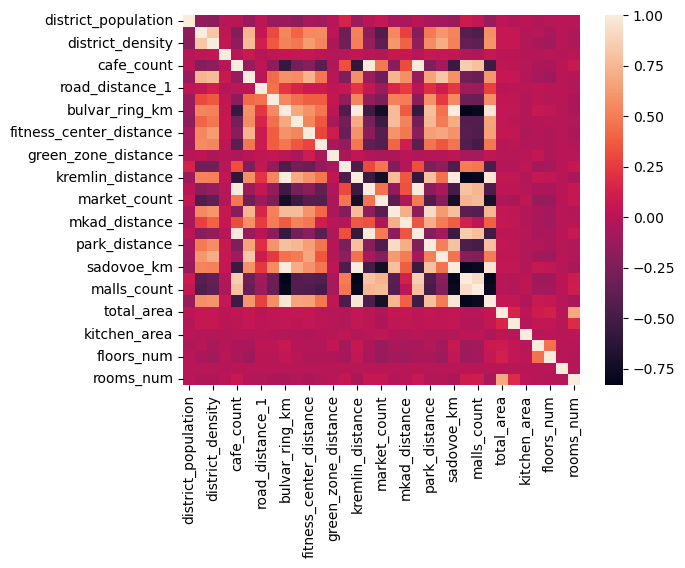

In [26]:
sns.heatmap(train_df[num_features].corr())
plt.show()

# Train test split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
ids = train_df['year'] != 2011

X_train, X_test, y_train, y_test = train_test_split(
    train_df.loc[ids, num_features + cat_features], 
    train_df.loc[ids, target], 
    test_size=0.3,
    random_state=42
)

# Make model

In [29]:
import numpy as np
import catboost as cb
import lightgbm
import optuna
from functools import partial
from sklearn.metrics import mean_squared_log_error, mean_squared_error

In [30]:
model = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.15,
    cat_features=cat_features, 
    verbose=False,
)
model.fit(X_train, y_train / X_train['total_area'])
y_pred = model.predict(X_test) * X_test['total_area']
np.sqrt(mean_squared_log_error(y_test, y_pred))

0.4515945597198061

In [31]:
test_df = pd.read_csv('test.csv')

In [32]:
test_df['district_density'] = test_df['district_area'] / test_df['district_population']

In [33]:
test_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month.astype(str)
test_df['year_month'] = test_df['year'].astype(str) + '_' +  test_df['month'].astype(str)

min_date = datetime(year=2010, month=1, day=1)
assert min_date < test_df['timestamp'].min()
test_df['days_since'] = (test_df['timestamp'] - min_date).dt.days

In [34]:
test_df['wall_material'] = test_df['wall_material'].astype(pd.Int64Dtype())
test_df.loc[test_df['wall_material'] == 3, 'wall_material'] = None

test_df.loc[:, ['wall_material']] = wall_imputer.transform(test_df[['wall_material']]).astype(str)

/tmp/ipykernel_34057/2225960965.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_df.loc[:, ['wall_material']] = wall_imputer.transform(test_df[['wall_material']]).astype(str)


In [35]:
test_df['state'] = test_df['state'].astype(pd.Int64Dtype())
test_df.loc[test_df['state'] == 33, 'state'] = None

test_df.loc[:, ['state']] = state_imputer.transform(test_df[['state']]).astype(str)

/tmp/ipykernel_34057/999045406.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  test_df.loc[:, ['state']] = state_imputer.transform(test_df[['state']]).astype(str)


## Model

In [37]:
train_df['square_price'] = train_df['result_price'] / train_df['total_area']

In [38]:
ids = train_df['year'] != 2010
ids = ids & (train_df['square_price'] < train_df['square_price'].quantile(0.99))

In [39]:
model = cb.CatBoostRegressor(
    iterations=1300,
    learning_rate=0.05,
    cat_features=cat_features,
)
model.fit(train_df.loc[ids, cat_features + num_features], train_df.loc[ids, 'square_price'], verbose=False)

In [40]:
y_pred = model.predict(test_df[cat_features + num_features])
test_df['square_price'] = y_pred

In [41]:
test_df['result_price'] = test_df['square_price'] * test_df['total_area']
test_df[['id', 'result_price']].to_csv('sub5.csv', index=None)

<AxesSubplot:>

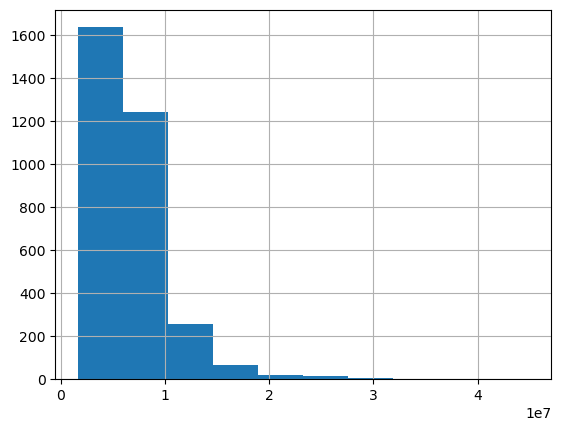

In [42]:
test_df['result_price'].hist()